In [1]:
#for exploration and visualisation:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

import pprint


In [2]:
%matplotlib inline

In [9]:
data = pd.read_csv('data/iris.csv') #replace with your file path 

In [10]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
setosa        50
versicolor    50
virginica     50
dtype: int64


Text(0, 0.5, 'Frequency')

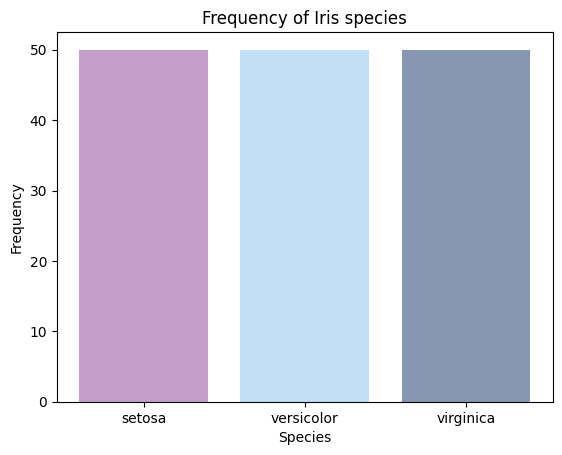

In [14]:
counts = data.groupby('species').size()
print(counts)

plt.bar(['setosa'], [50], color = '#C59FC9')
plt.bar(['versicolor'], [50], color = '#C1E0F7')
plt.bar(['virginica'], [50], color = '#8797B2')
plt.title("Frequency of Iris species")
plt.xlabel("Species") 
plt.ylabel("Frequency")

C:\Users\amand\AppData\Local\Temp\ipykernel_15712\720511891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette='flare')


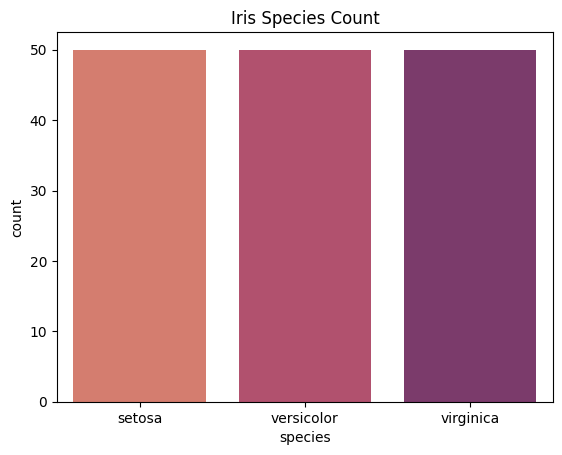

In [15]:
sns.countplot(x='species', data=data, palette='flare')
plt.title('Iris Species Count')
plt.xlabel('species')
plt.ylabel('count')

plt.show()

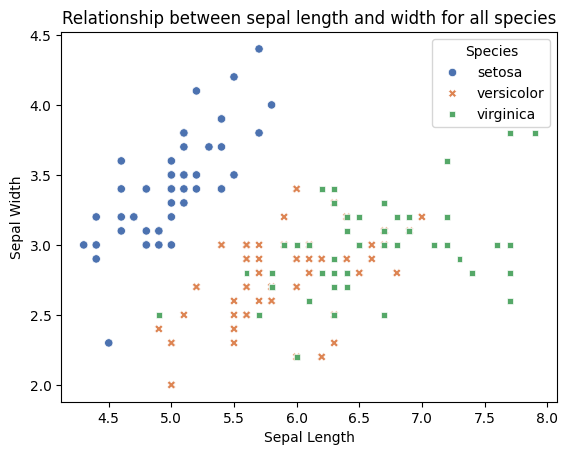

In [16]:
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', style='species', palette='deep')
plt.title("Relationship between sepal length and width for all species")
plt.xlabel("Sepal Length") 
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.show()

# Other Palette types: Plasma, viridis

In [18]:
heat_map = data.drop(columns=["species"])

<Axes: >

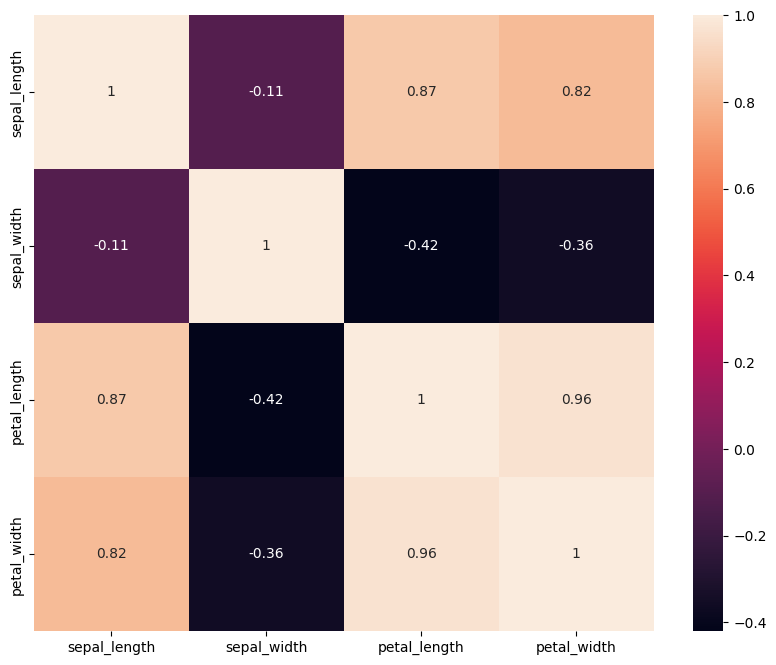

In [19]:
plt.figure(figsize = (10,8))
correlation_matrix = heat_map.corr() # apply to dataframe we have 

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True)

## Correlative significance: 
+ Strongest negative association with sepal width and petal length, indicating an inverse relationship between two values.
+ Negative association between sepal width and petal width, not as strong as previous, but strong enough to show an inverse relationship between these two variables 
+ Slight negative correlation between sepal length and width, I would not have said that this was a strong enough correlation to be significant

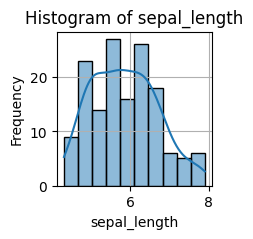

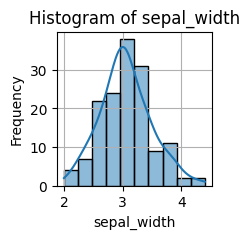

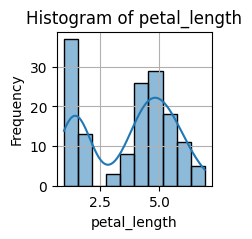

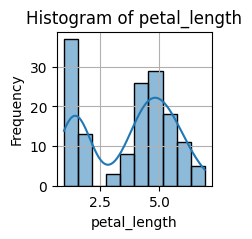

In [21]:
# distribution of variables

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_length']

for column in columns: 
    plt.figure(figsize = (2,2))
    sns.histplot(data=data, x=column, kde=True, bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show(columns)

## Distribution: 
+ Regular distribution for sepal width indicating regular distribution around a mean value
+ multiple peaks for petal length and width, with two bell curves. This distribution could be accounted for by the different species having different petal adaptations. This is filtered for each species further down to explore this.
+ Wide spread of data around mean on sepal length, could be accounted for by different species. 

<Axes: >

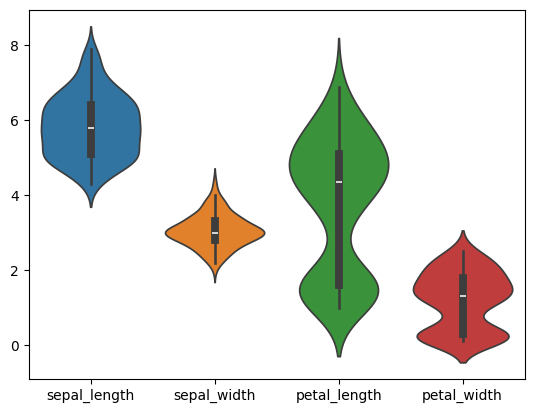

In [22]:
# Alternative plot for overall distribution: 
sns.violinplot(data=data)

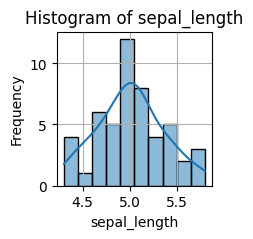

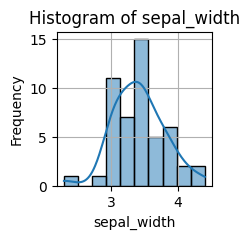

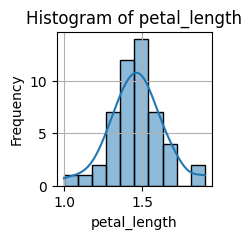

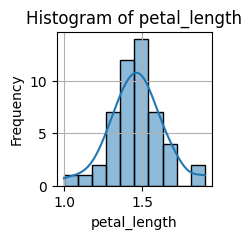

In [30]:
# Separate out species to analyse distribution of data across species. 
species_list = data["species"].unique()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_length']

for species in species_list:
    setosa_data = data[data["species"] == 'setosa'] #replace with other two species
for column in columns: 
    plt.figure(figsize = (2,2))
    sns.histplot(data=setosa_data, x=column, kde=True, bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show(columns)

#Other species: versicolor, virginica

Distribution appears more regular when accounting for species. 